# 왜 전통시장을 살려야 하는가?
- 유통 업태별 불변지수 및 경상지수 분석
- 전통시장 및 대형마트 빅3, 인터넷 쇼핑 상위 3위의 매출 추이 분석
- 전통시장 운영상황 분석

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 운영체제별 한글 폰트 설정
sns.set_style("darkgrid")

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
# 경상지수: 월별로 조사한 상품판매액을 기준년도(5년마다 갱신)의 월평균 상품판매액으로 나누어 작성
# 불변지수: 경상지수를 디플레이터(소비자 물가지수 이용)로 나누어 작성하며, 가격변동분을 제거하여 실질성장을 분석하는 활용
df1 = pd.read_csv('../data/소매업태별_판매액_경상지수.csv', index_col='Unnamed: 0')
df2 = pd.read_csv('../data/소매업태별_판매액_불변지수.csv', index_col='Unnamed: 0')
df1['year'] = df1.index
df2['year'] = df2.index

In [4]:
df1.head(1)

,총지수,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,체인 슈퍼마켓,일반 슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,승용차 소매점,...,전문소매점,가전·컴퓨터·통신기기 소매점,의복·신발·가방 소매점,음식·가정· 문화상품 소매점,의약품·화장품·기타상품 소매점,무점포 소매,인터넷 쇼핑,홈쇼핑,방문 및 배달 소매점,year
2013,95.6,103.0,103.4,74.3,95.4,93.5,96.7,71.0,98.1,72.1,...,100.9,109.3,NaN,NaN,NaN,84.4,73.9,94.5,107.7,2013


## 유통 업태별 불변지수 및 경상지수

In [5]:
def ts_plot(data, row_num, col_num) :
    fig, ax = plt.subplots(ncols = col_num, figsize = (18,4))
    rep = int(len(data.columns) / col_num)
    
    for i in range(col_num) :
        ax[i].plot(data.iloc[:, row_num + (rep * i)])
        ax[i].set_title(data.iloc[:, row_num + (rep * i)].name)

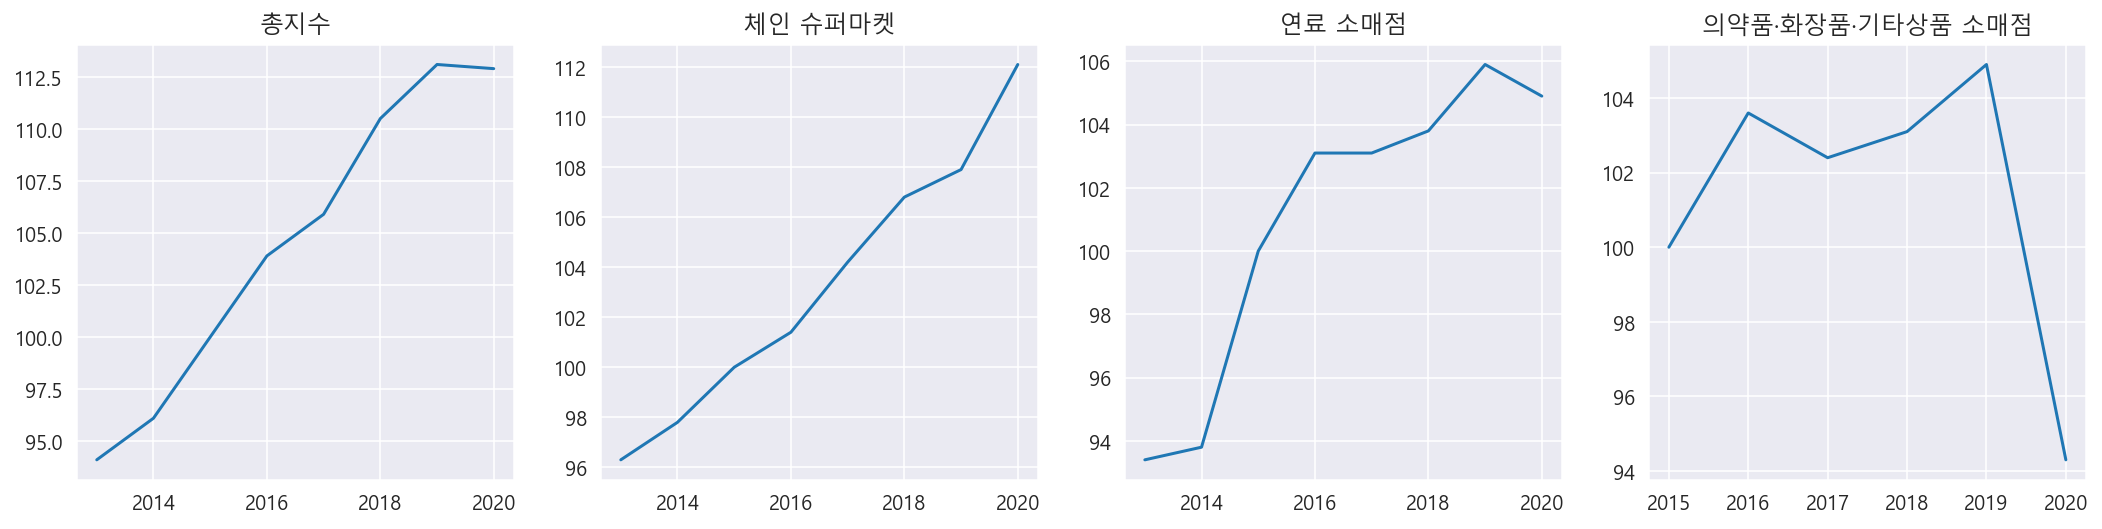

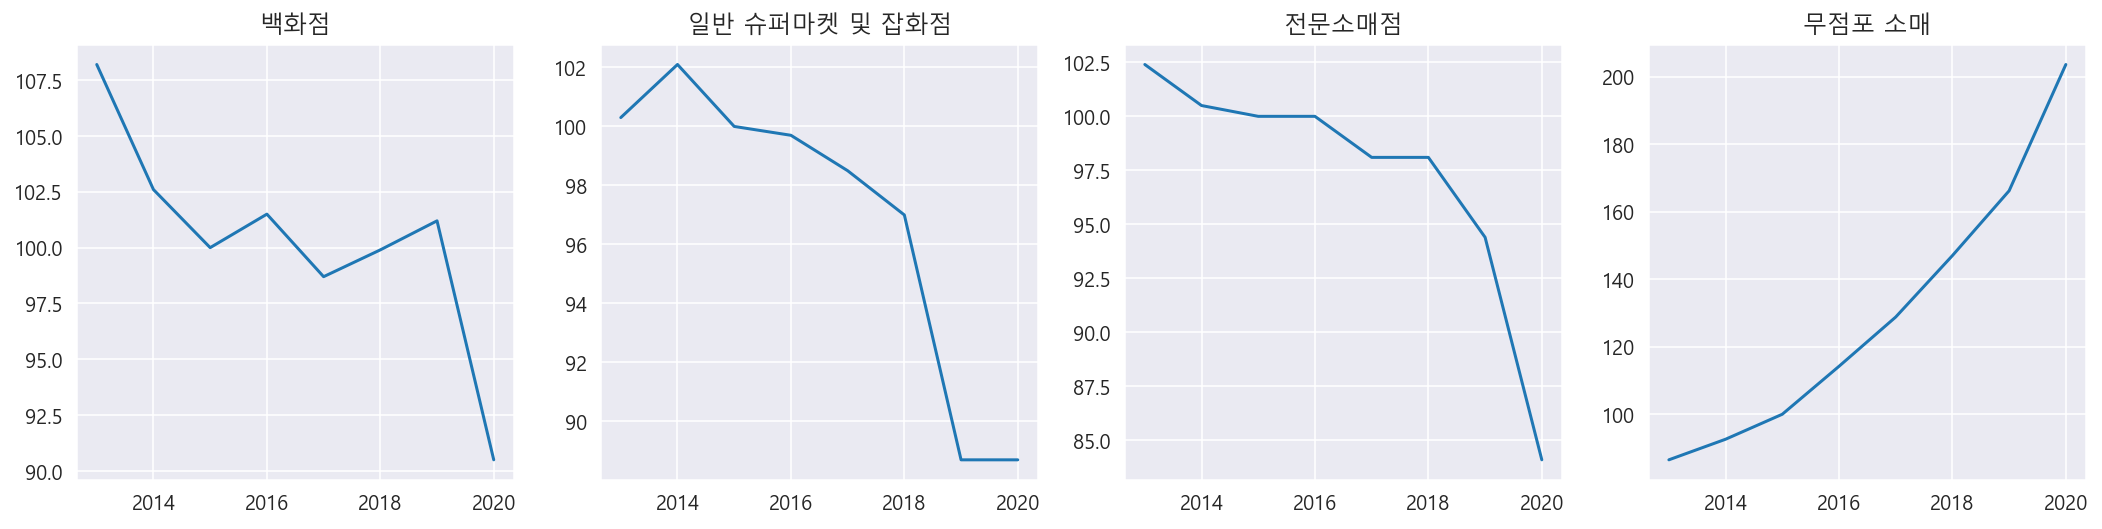

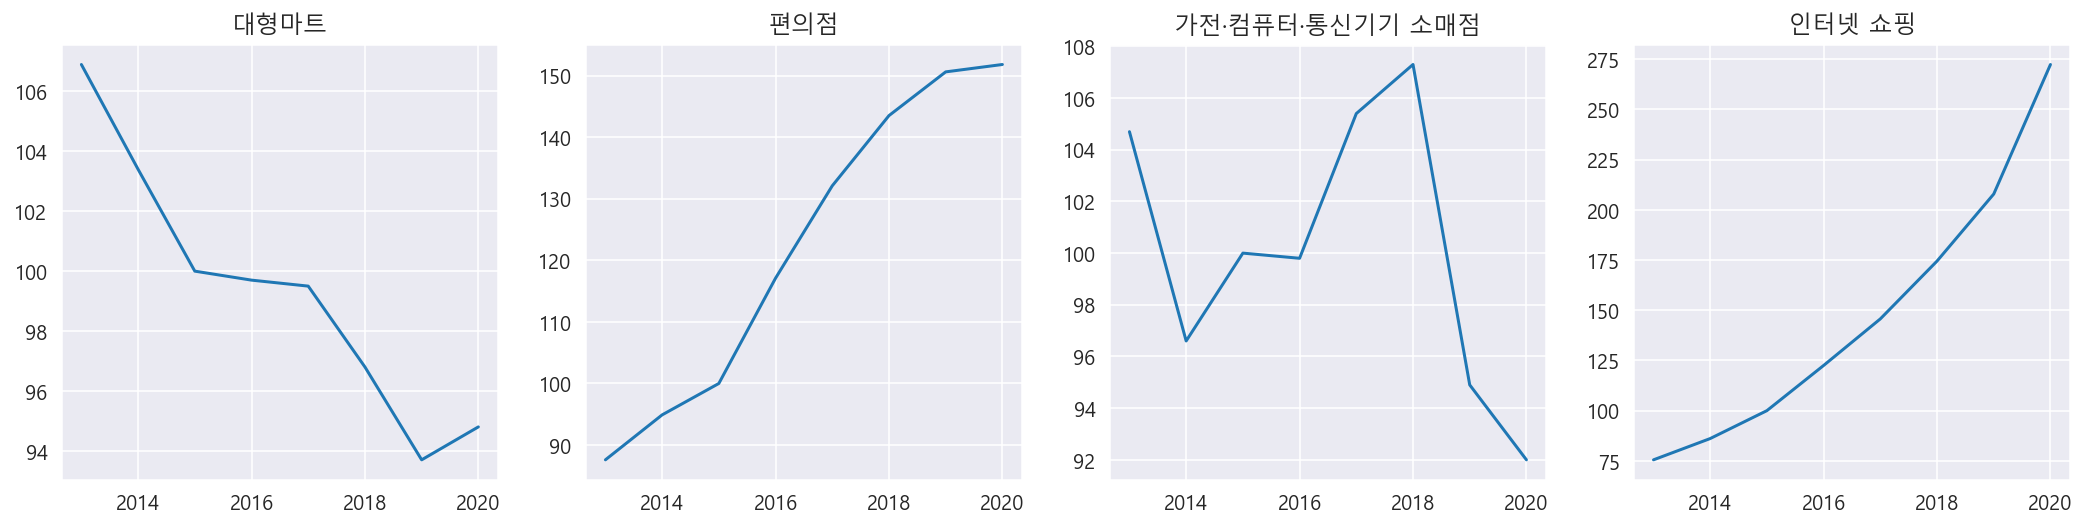

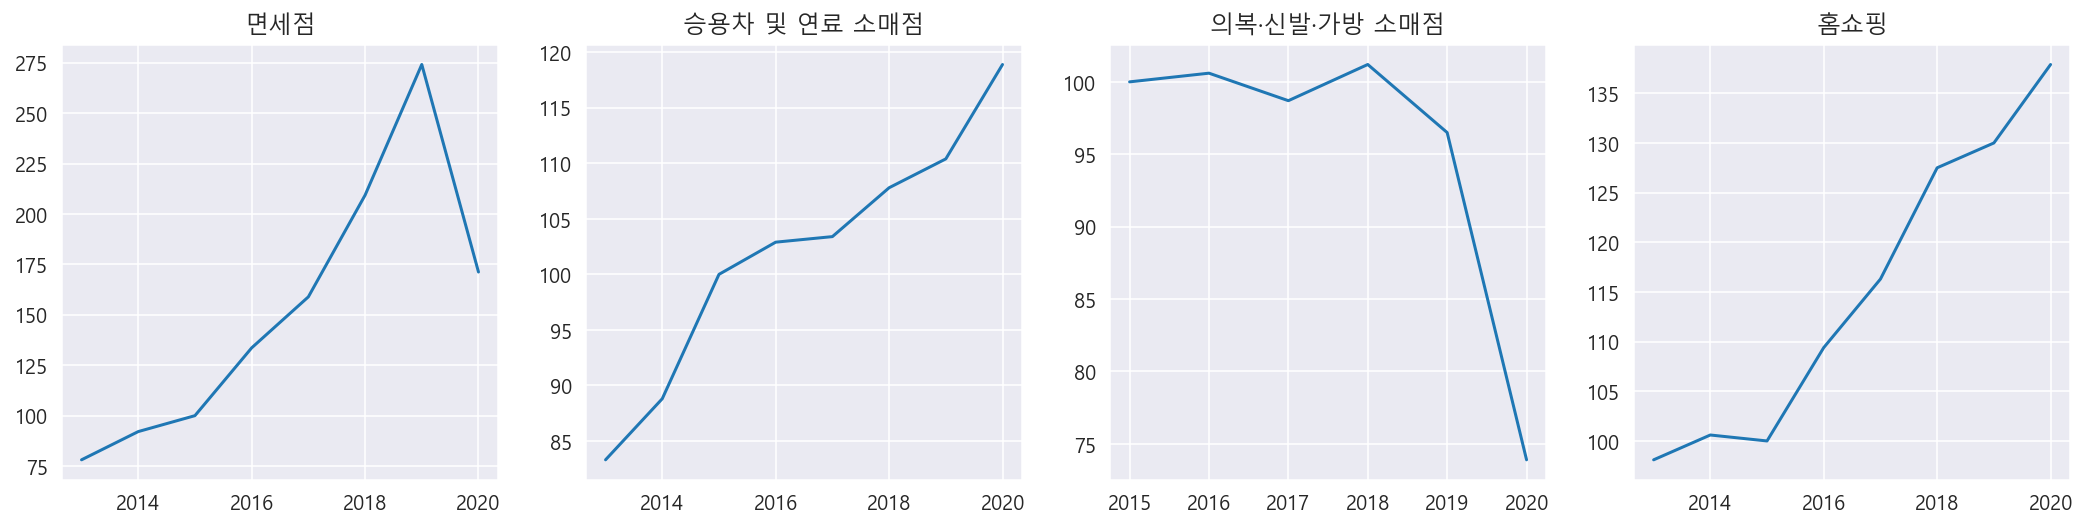

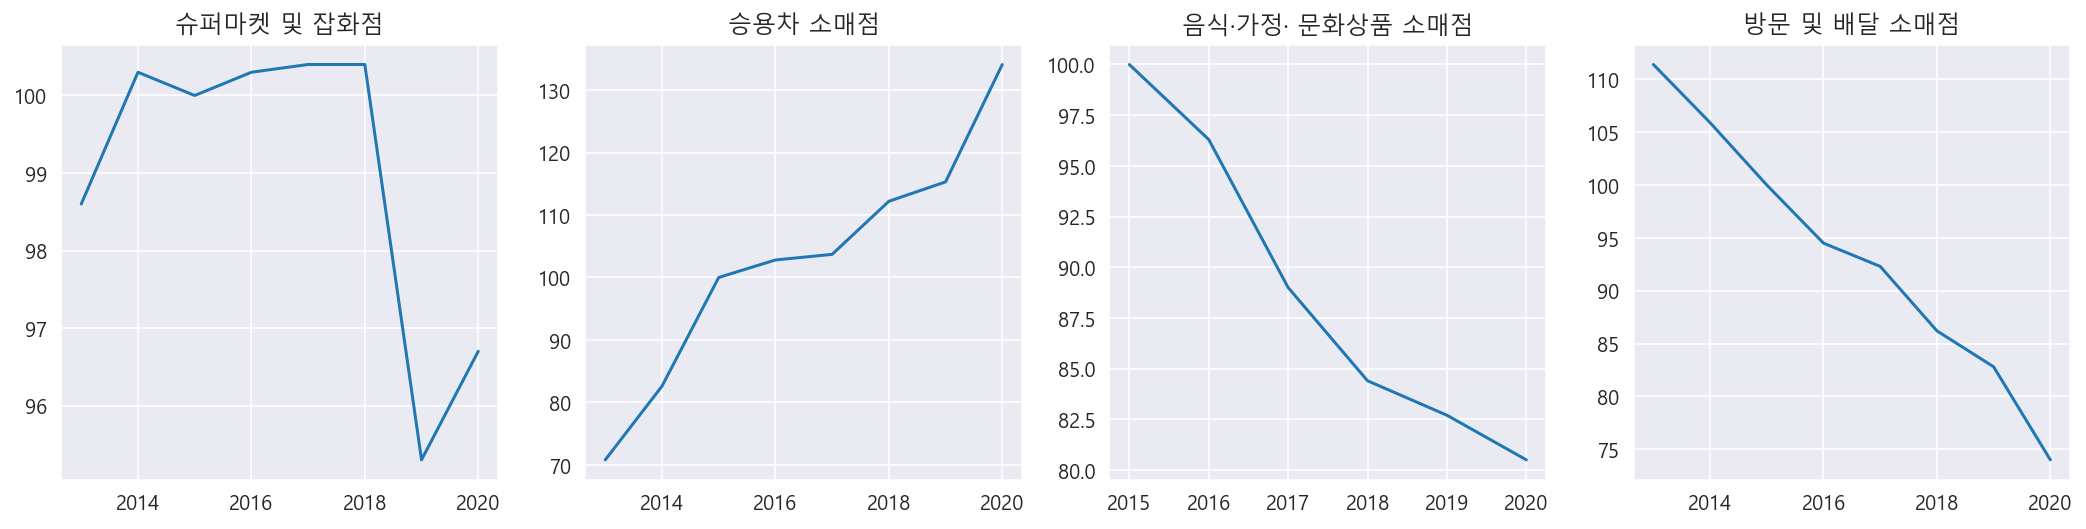

In [6]:
# 불변지수 확인
for row_num in range(5) :
    ts_plot(df2, row_num, 4)

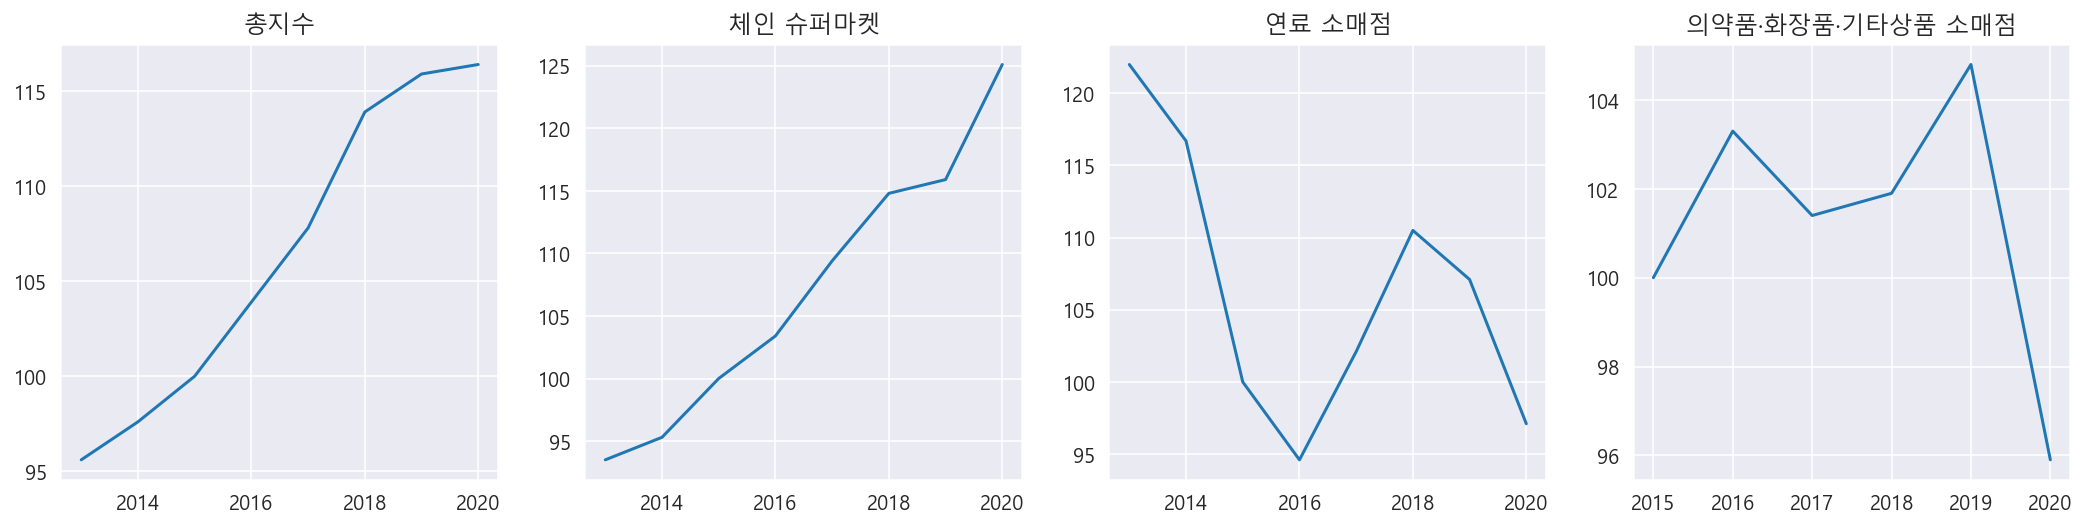

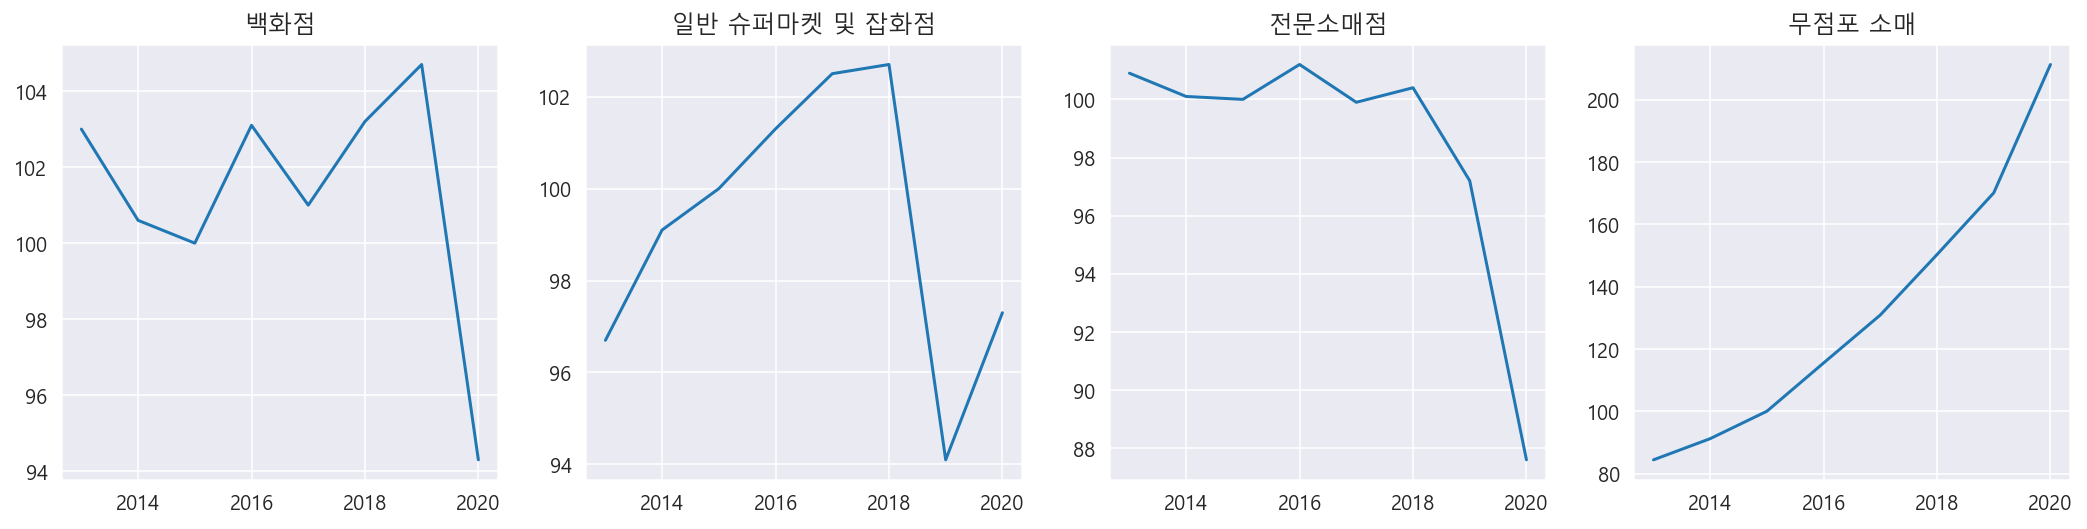

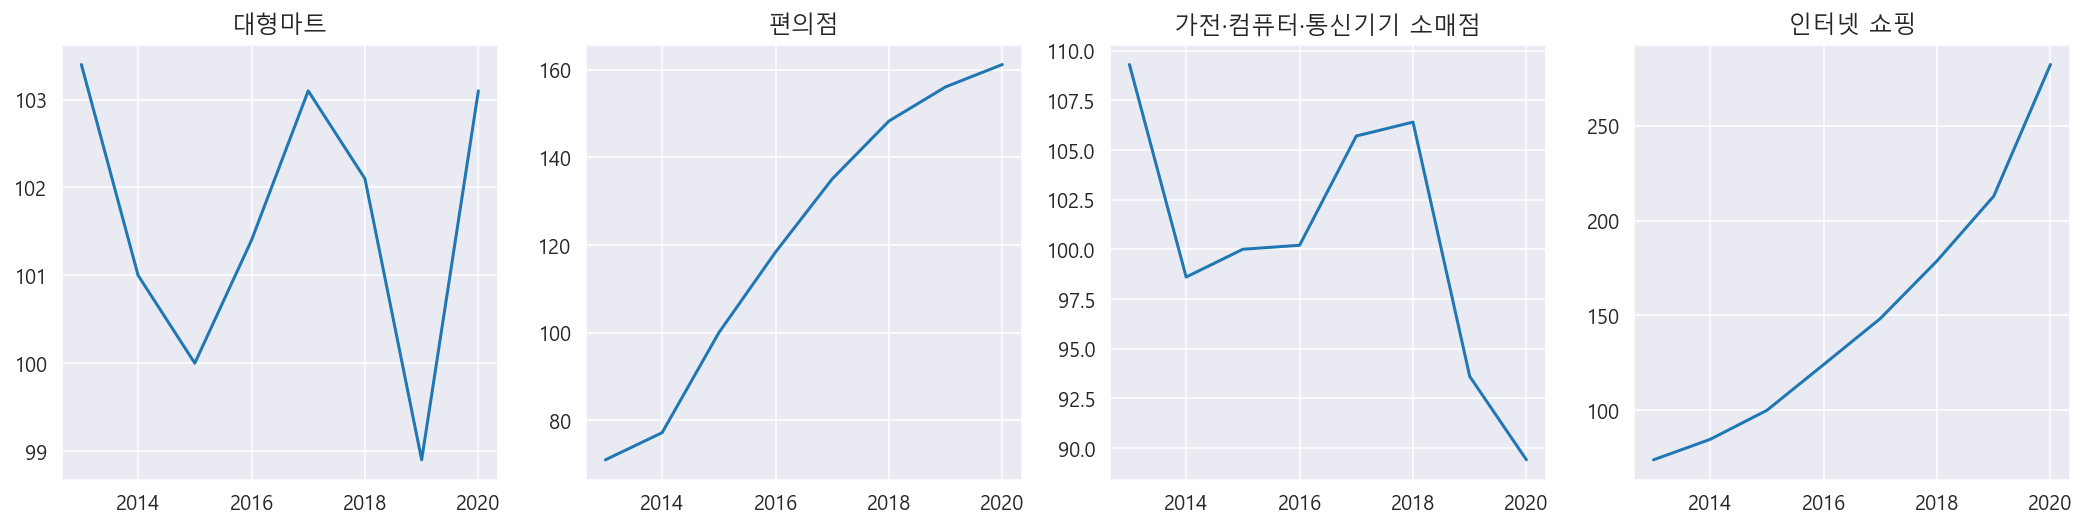

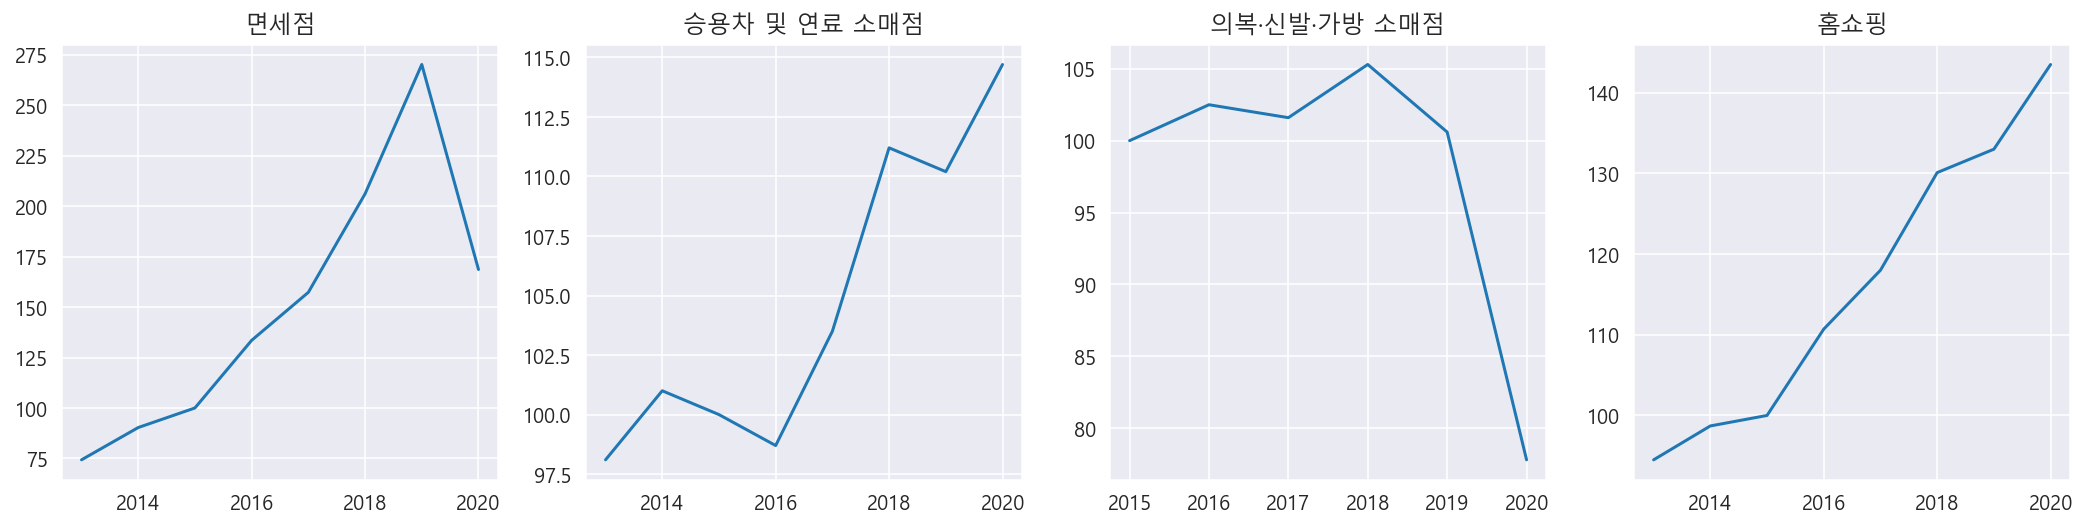

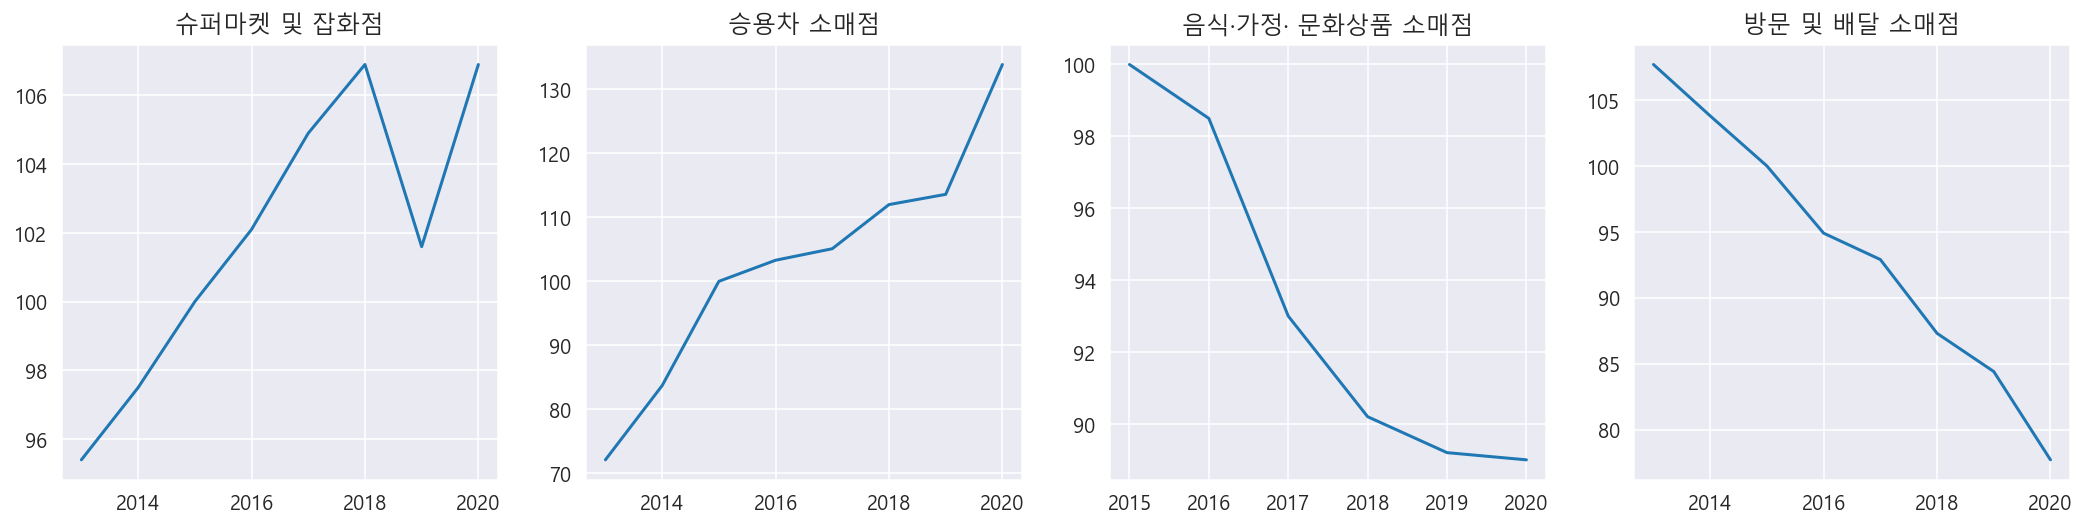

In [7]:
# 경상지수 확인
for row_num in range(5):
    ts_plot(df1,row_num,4)

## 전통시장 및 대형마트 빅3, 인터넷 쇼핑 상위 3위의 매출 추이

In [8]:
df3 = pd.read_csv('../data/유형별 매출.csv', index_col='년도')
df3.head()

,전통시장,이마트,롯데마트,홈플러스,이베이코리아유한책임회사,쿠팡,위메프,화폐가치
년도,,,,,,,,
2013,213898,110043,88365,70863,6622,478,746,0.980
2014,228183,109103,82091,73255,7339,3485,1258,0.993
2015,252743,110283,83237,70526,7994,11337,2165,1.000
2016,262351,113336,82007,67468,8634,19159,3691,1.010
2017,271241,116828,65774,66067,9519,26813,4730,1.029


In [9]:
# 화폐가치를 2015년도 기준으로 동일하게 처리
for i in range(len(df3.columns)-1) :
    df3[df3.columns[i]] /= df3['화폐가치']
df3.head()

,전통시장,이마트,롯데마트,홈플러스,이베이코리아유한책임회사,쿠팡,위메프,화폐가치
년도,,,,,,,,
2013,218263.265306,112288.775510,90168.367347,72309.183673,6757.142857,487.755102,761.224490,0.980
2014,229791.540785,109872.104733,82669.687815,73771.399799,7390.735146,3509.566969,1266.868077,0.993
2015,252743.000000,110283.000000,83237.000000,70526.000000,7994.000000,11337.000000,2165.000000,1.000
2016,259753.465347,112213.861386,81195.049505,66800.000000,8548.514851,18969.306931,3654.455446,1.010
2017,263596.695821,113535.471331,63920.310982,64205.053450,9250.728863,26057.337221,4596.695821,1.029


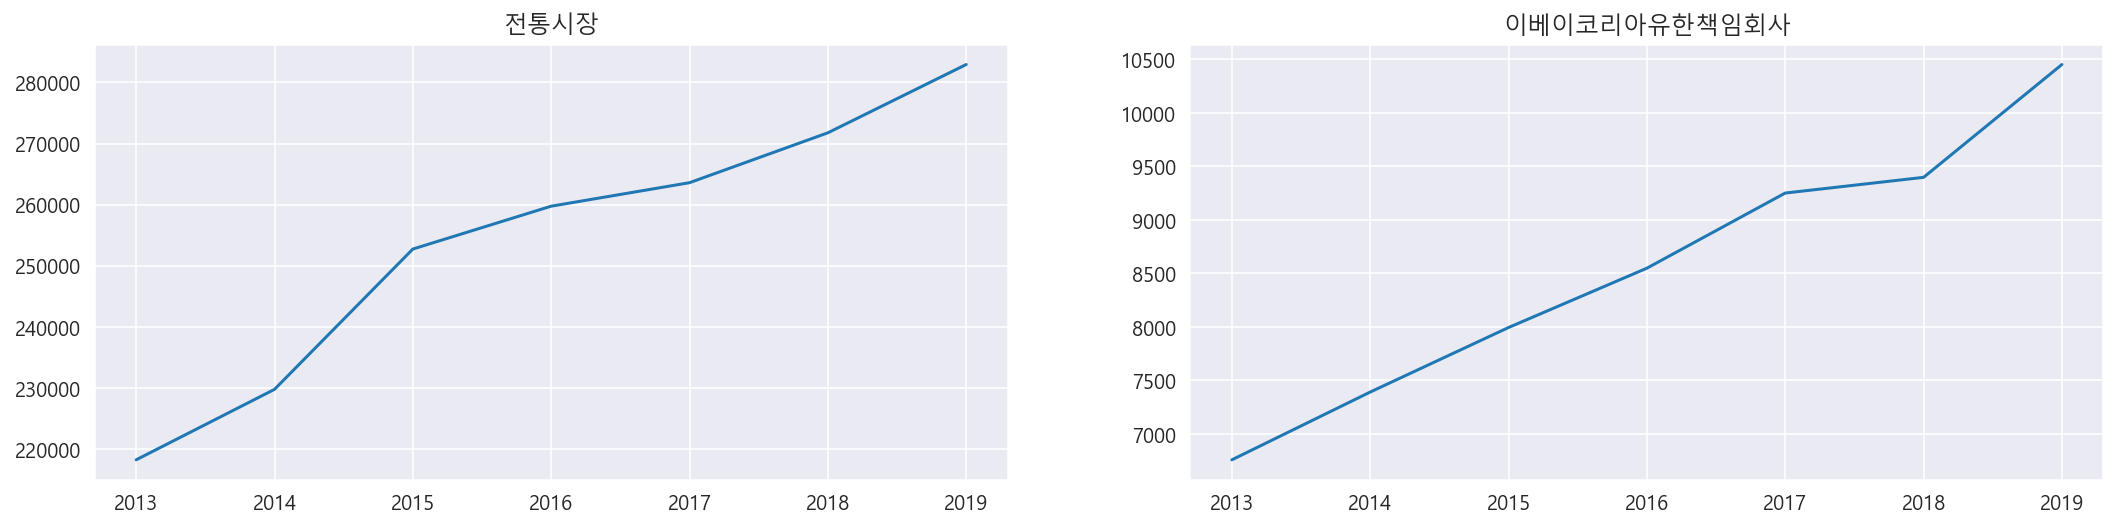

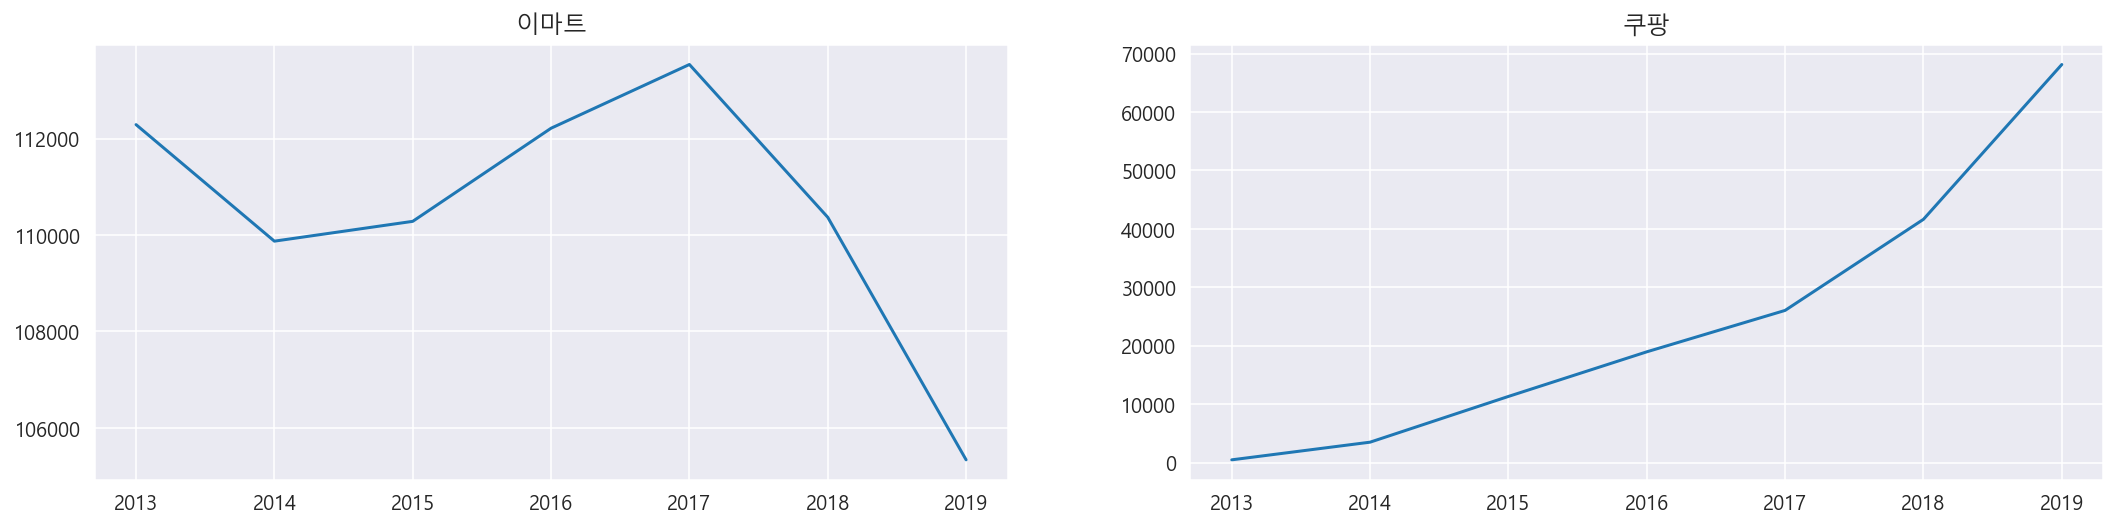

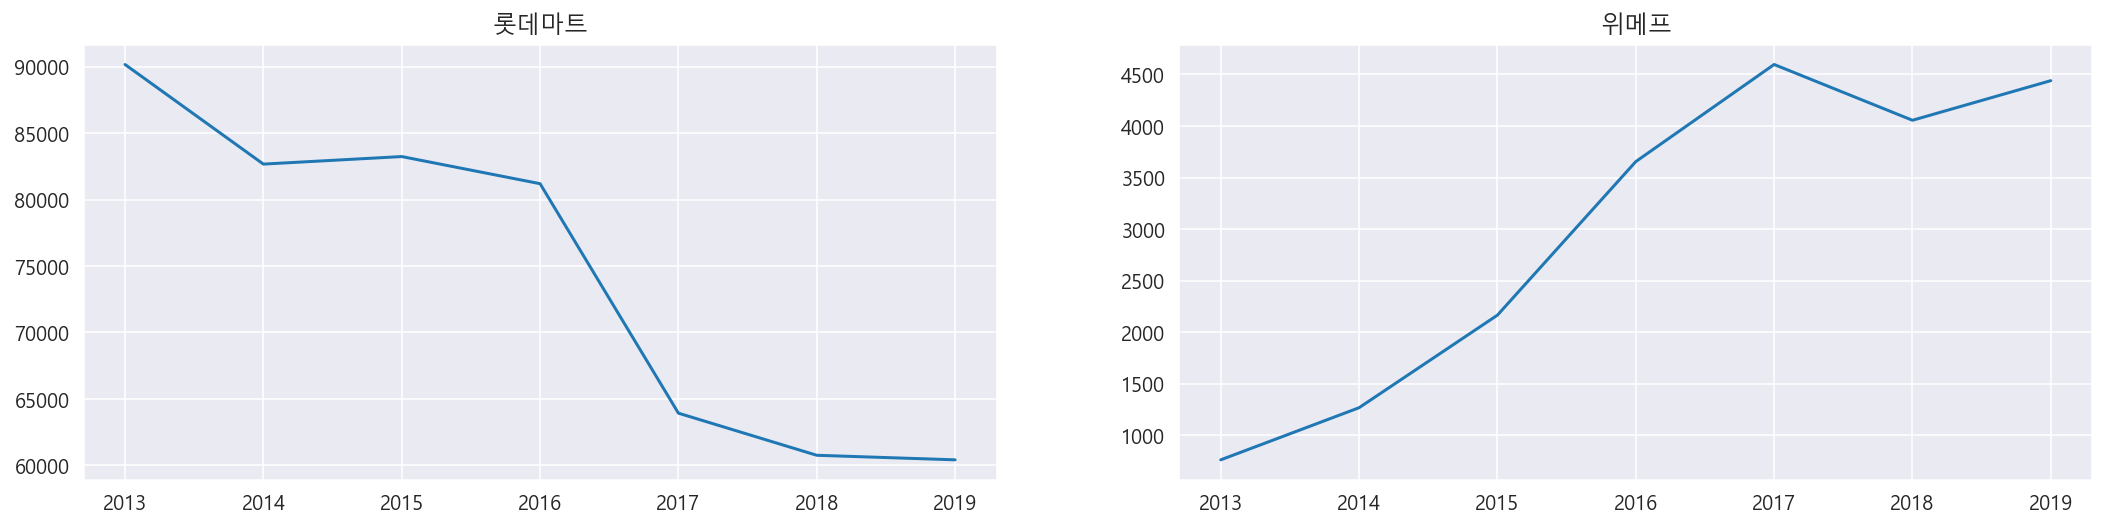

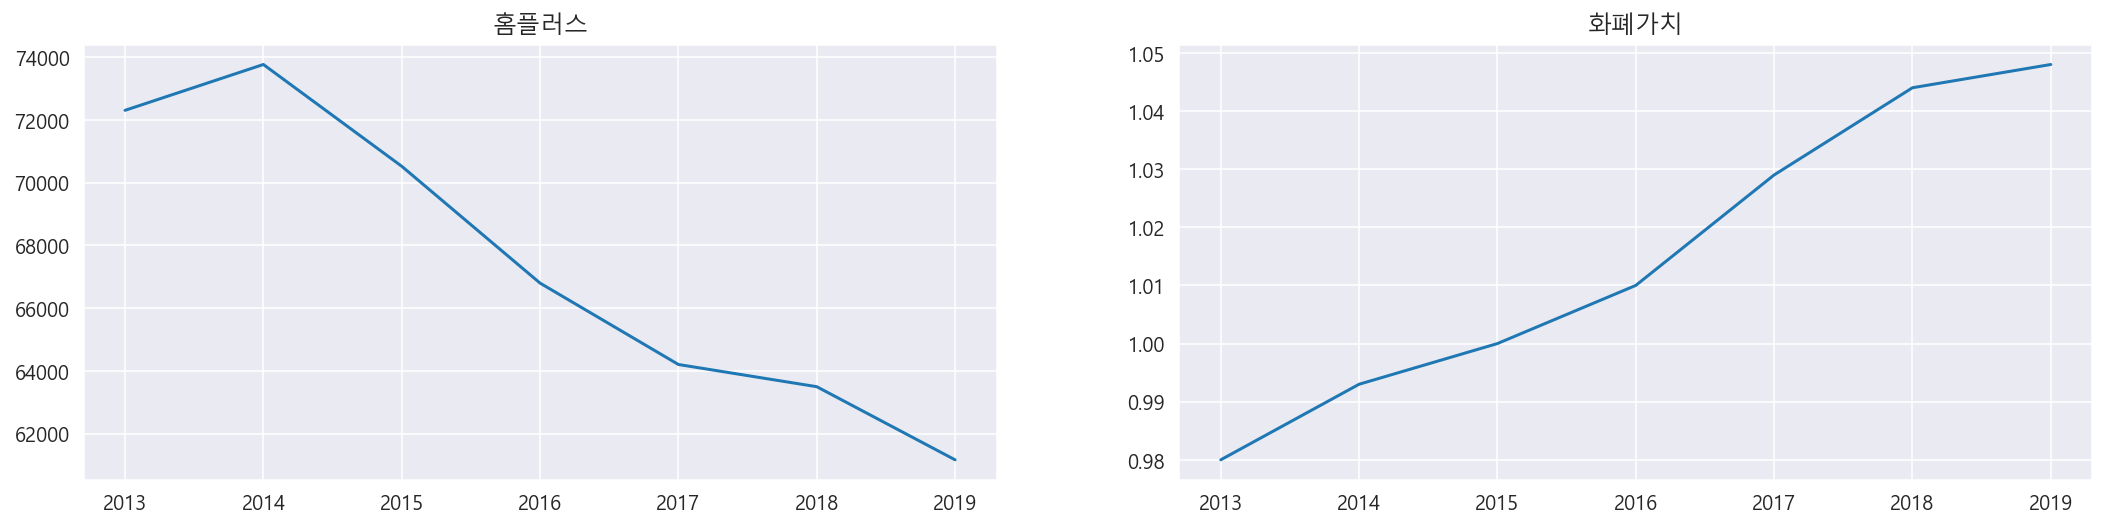

In [10]:
for row_num in range(4):
    ts_plot(df3, row_num, 2)

In [11]:
df3['대형마트'] = df3['이마트'] + df3['롯데마트'] + df3['홈플러스']
df3['대형마트'] = df3['대형마트'] * 1.8867 # 점유율을 통한 가중치 계산

df3['온라인'] = df3['이베이코리아유한책임회사'] + df3['쿠팡'] + df3['위메프']
df3['온라인'] = df3['온라인'] * 3.3 # 점유율을 통한 중치 계산

In [12]:
# 전통시장, 대형마트 3사, 온라인 3사를 최종 비교하기 위한 DataFrame 생성
big3 = df3[['전통시장', '대형마트', '온라인']]

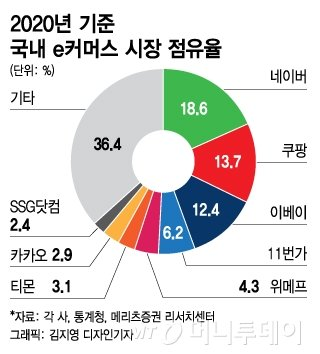
https://news.mt.co.kr/mtview.php?no=2021041915160413506

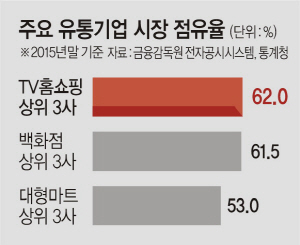
http://www.munhwa.com/news/view.html?no=2016122601072003016001

<AxesSubplot:ylabel='년도'>

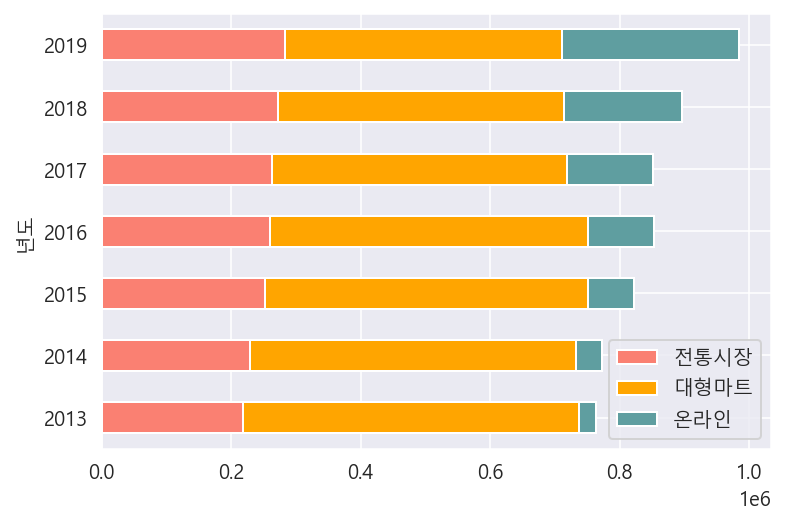

In [13]:
big3.plot.barh(stacked=True, color=['salmon', 'orange', 'cadetblue'])

- 대형마트는 감소추세, 온라인시장은 급격한 증가 추세

- 전통시장은 매출이 증가하고 있지만 2015년 이후 큰 증가 추세는 보이고 있지 않음

- 2020년 및 2021 코로나 19의 영항으로 사회적거리두기에 따라 대형마트를 운영하는 유통업계는 온라인 서비스사업에 더 많은 투자가 이루어지고 있지만 전통시장 이런 영향에 돌파구 마련이 쉽지않아 매출에 급격한 감소 및 큰 타격이 있을것으로 예상됨

## 전통시장 운영상황 분석

In [14]:
market_check = pd.read_excel('../data/시장상황.xlsx',index_col='년도')
market_check.head()

,전통시장 평균고객,종사자수,보증금,임대료,점포주연령,29세이하점포주,빈점포,점포수,기본시설,일평균매출,전통시장수,전체 소상공인 매출
년도,,,,,,,,,,,,
2013,3388.8,351240,2006.9,75.5,55.2,0.9,19599,210433,1502,4271.3,1502,0.000000
2014,3337.6,367692,2011.2,73.4,56.0,1.5,18873,209493,1536,4471.8,1536,0.000000
2015,4349.0,356176,2052.6,74.1,56.1,1.8,18821,207083,1439,4812.0,1439,0.000000
2016,4486.0,368930,2077.2,75.2,56.8,1.0,18807,209193,1441,4988.0,1441,0.000000
2017,4553.0,363660,2083.9,76.0,57.2,0.8,17504,209884,1450,5125.0,1450,878.938316


### 전통시장 매출 추이
- 전통시장 현대화 및 정책의 효과등으로 전통시장의 매출은 지속적으로 상승세를 보이고 있다.

<AxesSubplot:xlabel='년도', ylabel='전통시장 매출추이'>

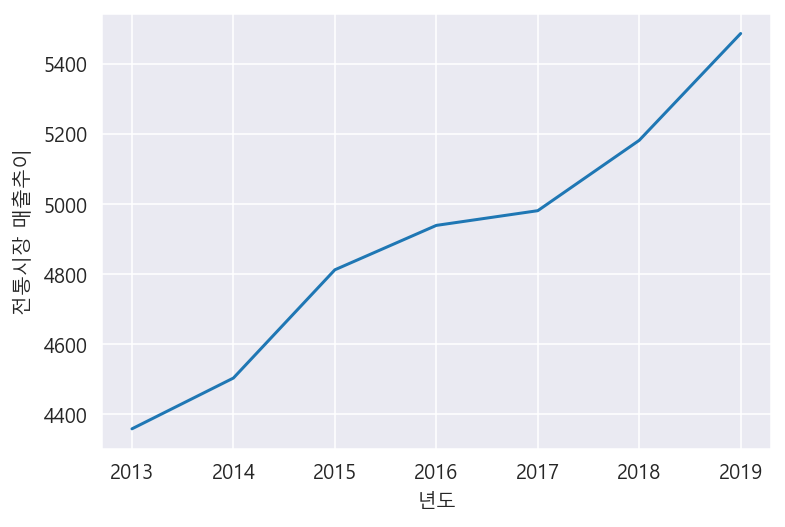

In [15]:
market_check['년도']=market_check.index
market_check['전통시장 매출추이']=market_check['일평균매출']/df3['화폐가치']

sns.lineplot(x='년도', y='전통시장 매출추이',data=market_check)

### 최근 3년간의 전통시장 및 소상공인 매출 추이 비교
- 지속적인 전통시장의 매출 상승에도 불구하고 2017~2019년간 전체 소상공인 매출 대비 전통시장의 매출을 비교했을때 매출이 낮았다. 


In [16]:
market_check['화폐가치'] = df3['화폐가치']

sijang_monthly_sales = (market_check['일평균매출'] * 30) 
sijang_monthly_sales_all = sijang_monthly_sales * market_check['전통시장수']
sijang_monthly_sales_for_person = sijang_monthly_sales_all / market_check['종사자수']
sijang_sales = sijang_monthly_sales_for_person / market_check['화폐가치']
three_years_sijang = (sijang_sales[2017] + sijang_sales[2018] + sijang_sales[2019]) / 3

sosang_sales = market_check['전체 소상공인 매출'] / market_check['화폐가치']
three_years_sosang = (sosang_sales[2017] + sosang_sales[2018] + sosang_sales[2019]) / 3

([<matplotlib.patches.Wedge at 0x26c43071be0>,
 [Text(0.2386631114683845, 1.0737969636873768, '최근 3년간 평균 전통시장 매출'),
  Text(-0.23866301093225573, -1.0737969860326253, '최근 3년간 평균 소상공인 매출')],
 [Text(0.13017987898275518, 0.5857074347385691, '43.0%'),
  Text(-0.13017982414486673, -0.5857074469268865, '57.0%')])

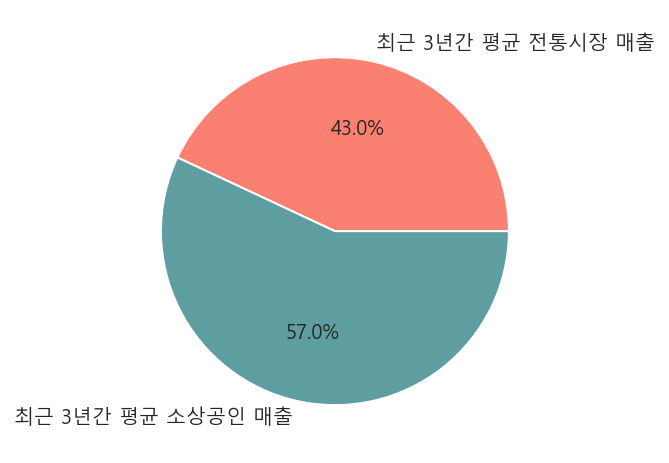

In [17]:
labels=['최근 3년간 평균 전통시장 매출', '최근 3년간 평균 소상공인 매출']
plt.pie([three_years_sijang, three_years_sosang], labels=labels, autopct='%.1f%%', colors=['salmon', 'cadetblue'])

### 운영점포수 추이
- 전통시장의 운영점포수는 점점 낮아지고 있다.

<AxesSubplot:xlabel='년도', ylabel='운영점포수'>

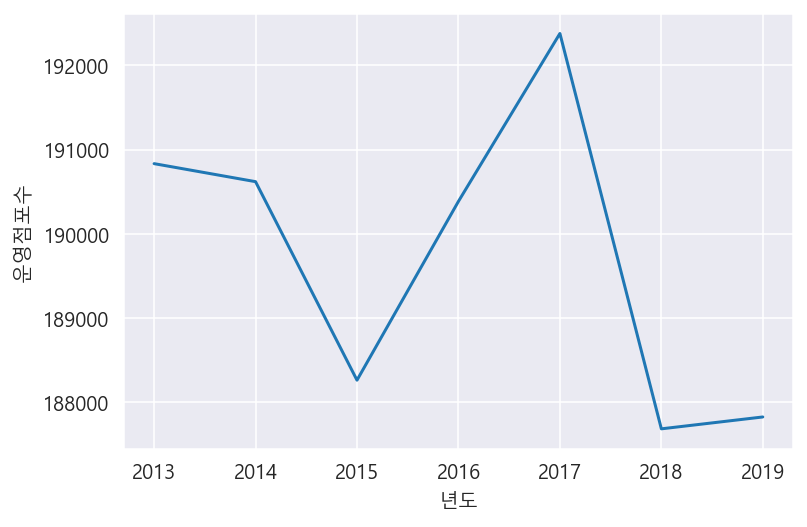

In [18]:
market_check['운영점포수']=market_check['점포수']-market_check['빈점포']
sns.lineplot(x='년도', y='운영점포수',data=market_check)

### 청년 종사자 추이
- 점포주 연령은 점점 높아지고 있으며 29세이하 종사자의 수는 급격히 낮아지고 있어 다른 산업군과의 정보 격차 및 시장의 세퇴가 우려된다.


<AxesSubplot:xlabel='년도', ylabel='청년종사자'>

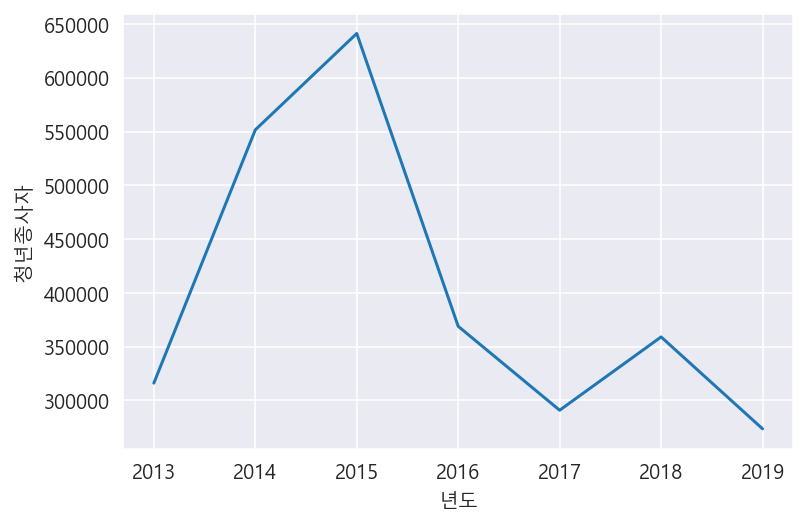

In [19]:
market_check['청년종사자'] = market_check['종사자수']*market_check['29세이하점포주'] # 29세이하점포주: 29세이하점포주 비율을 나타냄
sns.lineplot(x='년도', y='청년종사자',data=market_check)

<AxesSubplot:xlabel='년도', ylabel='점포주연령'>

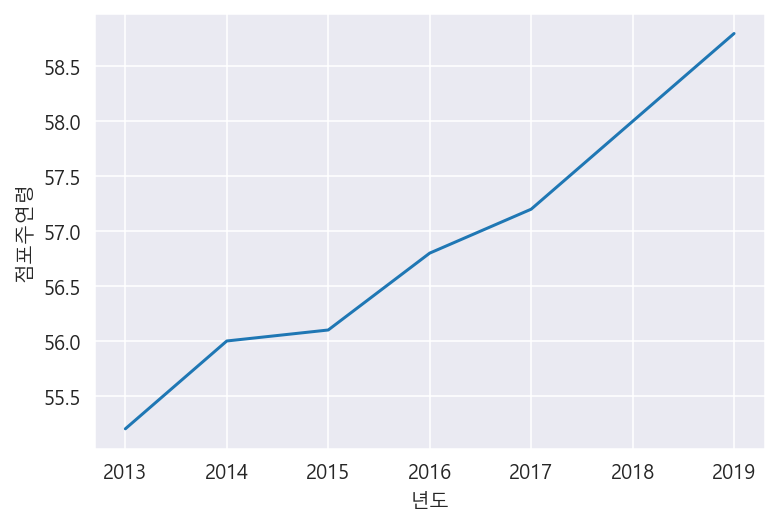

In [20]:
sns.lineplot(x='년도', y='점포주연령',data=market_check)

### 방문고객 소비액 추이
- 또한 소비자는 대형마트, 이커머스시장의 확대로 인해 선택의 폭이 높아져 시장에서 사용하는 금액은 점차 줄어들고 있다.

<AxesSubplot:xlabel='년도', ylabel='1회소비액'>

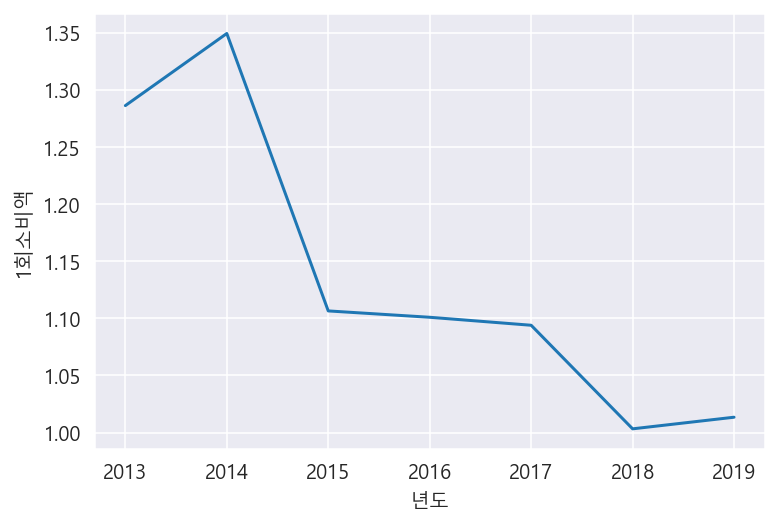

In [21]:
market_check['1회소비액'] = market_check['일평균매출'] / market_check['전통시장 평균고객'] / market_check['화폐가치']
sns.lineplot(x='년도', y='1회소비액',data=market_check)